#Trabalho Final Lia

Nome: Gabriel Honorato Andrade Martins - 202104965

##Visão geral

Este projeto utiliza dois modelos YOLO integrados para detectar sinais de trânsito em imagens e vídeos, incluindo placas e semáforos, com foco em simular o comportamento de um carro autônomo.

**Principais recursos:**

Alternância inteligente entre modelos:
Usa o modelo yolov8n.pt para detectar semáforos e placa de pare, e um modelo personalizado treinado com o Roboflow para diversas outras placas brasileiras.

Análise real de cor do semáforo:
Verifica a região do semáforo detectado e analisa a cor (vermelho, amarelo ou verde) usando a conversão HSV, indicando se o carro deve parar, reduzir ou seguir.

Mensagens em tempo real na tela:
Simula um painel de bordo de veículo autônomo, exibindo mensagens como:

🛑 “Parar imediatamente”

⚠️ “Limite de velocidade: 40 km/h”

🔄 “Rotatória à frente”

🟢 “Prosseguindo” (semáforo verde)

###Instalando ultralytics

In [1]:
!nvidia-smi

Tue Jun 24 22:02:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   67C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.7 MB/s eta 0:00:00


###Instalando dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kYGYI8IE4EXnQFaB9qei")
project = rf.workspace("ia-axk16").project("placas-transito")
version = project.version(10)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to placas-transito-10 in yolov8:: 100%|██████████| 5104/5104 [00:00<00:00, 8545.00it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO

100%|██████████| 6.25M/6.25M [00:00<00:00, 91.5MB/s]


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/placas-transito-10/data.yaml epochs=50 imgsz=640 workers=2

Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/placas-transito-10/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, p

###Matriz de confusão do modelo2

In [ ]:
# Instalar a biblioteca Ultralytics, se necessário
!pip install ultralytics --upgrade -q

# Importar a YOLO
from ultralytics import YOLO
from IPython.display import Image, display

# Carregar o modelo treinado (substitua pelo caminho correto se necessário)
model2 = YOLO('/content/runs/detect/train/weights/best.pt')  # seu modelo 2

# Avaliar o modelo no conjunto de validação (usa o validation set configurado no treinamento)
metrics = model2.val()  # isso vai gerar matriz de confusão e outros gráficos



Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 264.9±87.5 MB/s, size: 4.6 KB)


val: Scanning /content/placas-transito-10/valid/labels.cache... 464 images, 2 backgrounds, 0 corrupt: 100%|██████████| 464/464 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:05<00:00,  5.75it/s]


                   all        464        584      0.876        0.8      0.884      0.694
          NoEstacionar         26         27      0.741      0.556        0.7      0.402
              NoSeguir         15         16      0.748      0.812      0.856      0.658
         NoUltrapassar         10         10      0.856          1      0.995      0.799
        NoVirarDireita         21         21      0.896      0.819      0.932      0.759
       NoVirarEsquerda         41         44      0.918      0.727      0.876      0.717
              NoVirarU         43         43          1       0.87      0.961      0.657
                  Pare         20         20          1      0.775      0.887      0.735
             Rotatoria         16         16        0.9      0.812      0.767      0.573
           preferencia         37         37       0.94      0.973      0.962      0.819
       speed_limit_100         50         54       0.91      0.747      0.892      0.606
       speed_limit_11

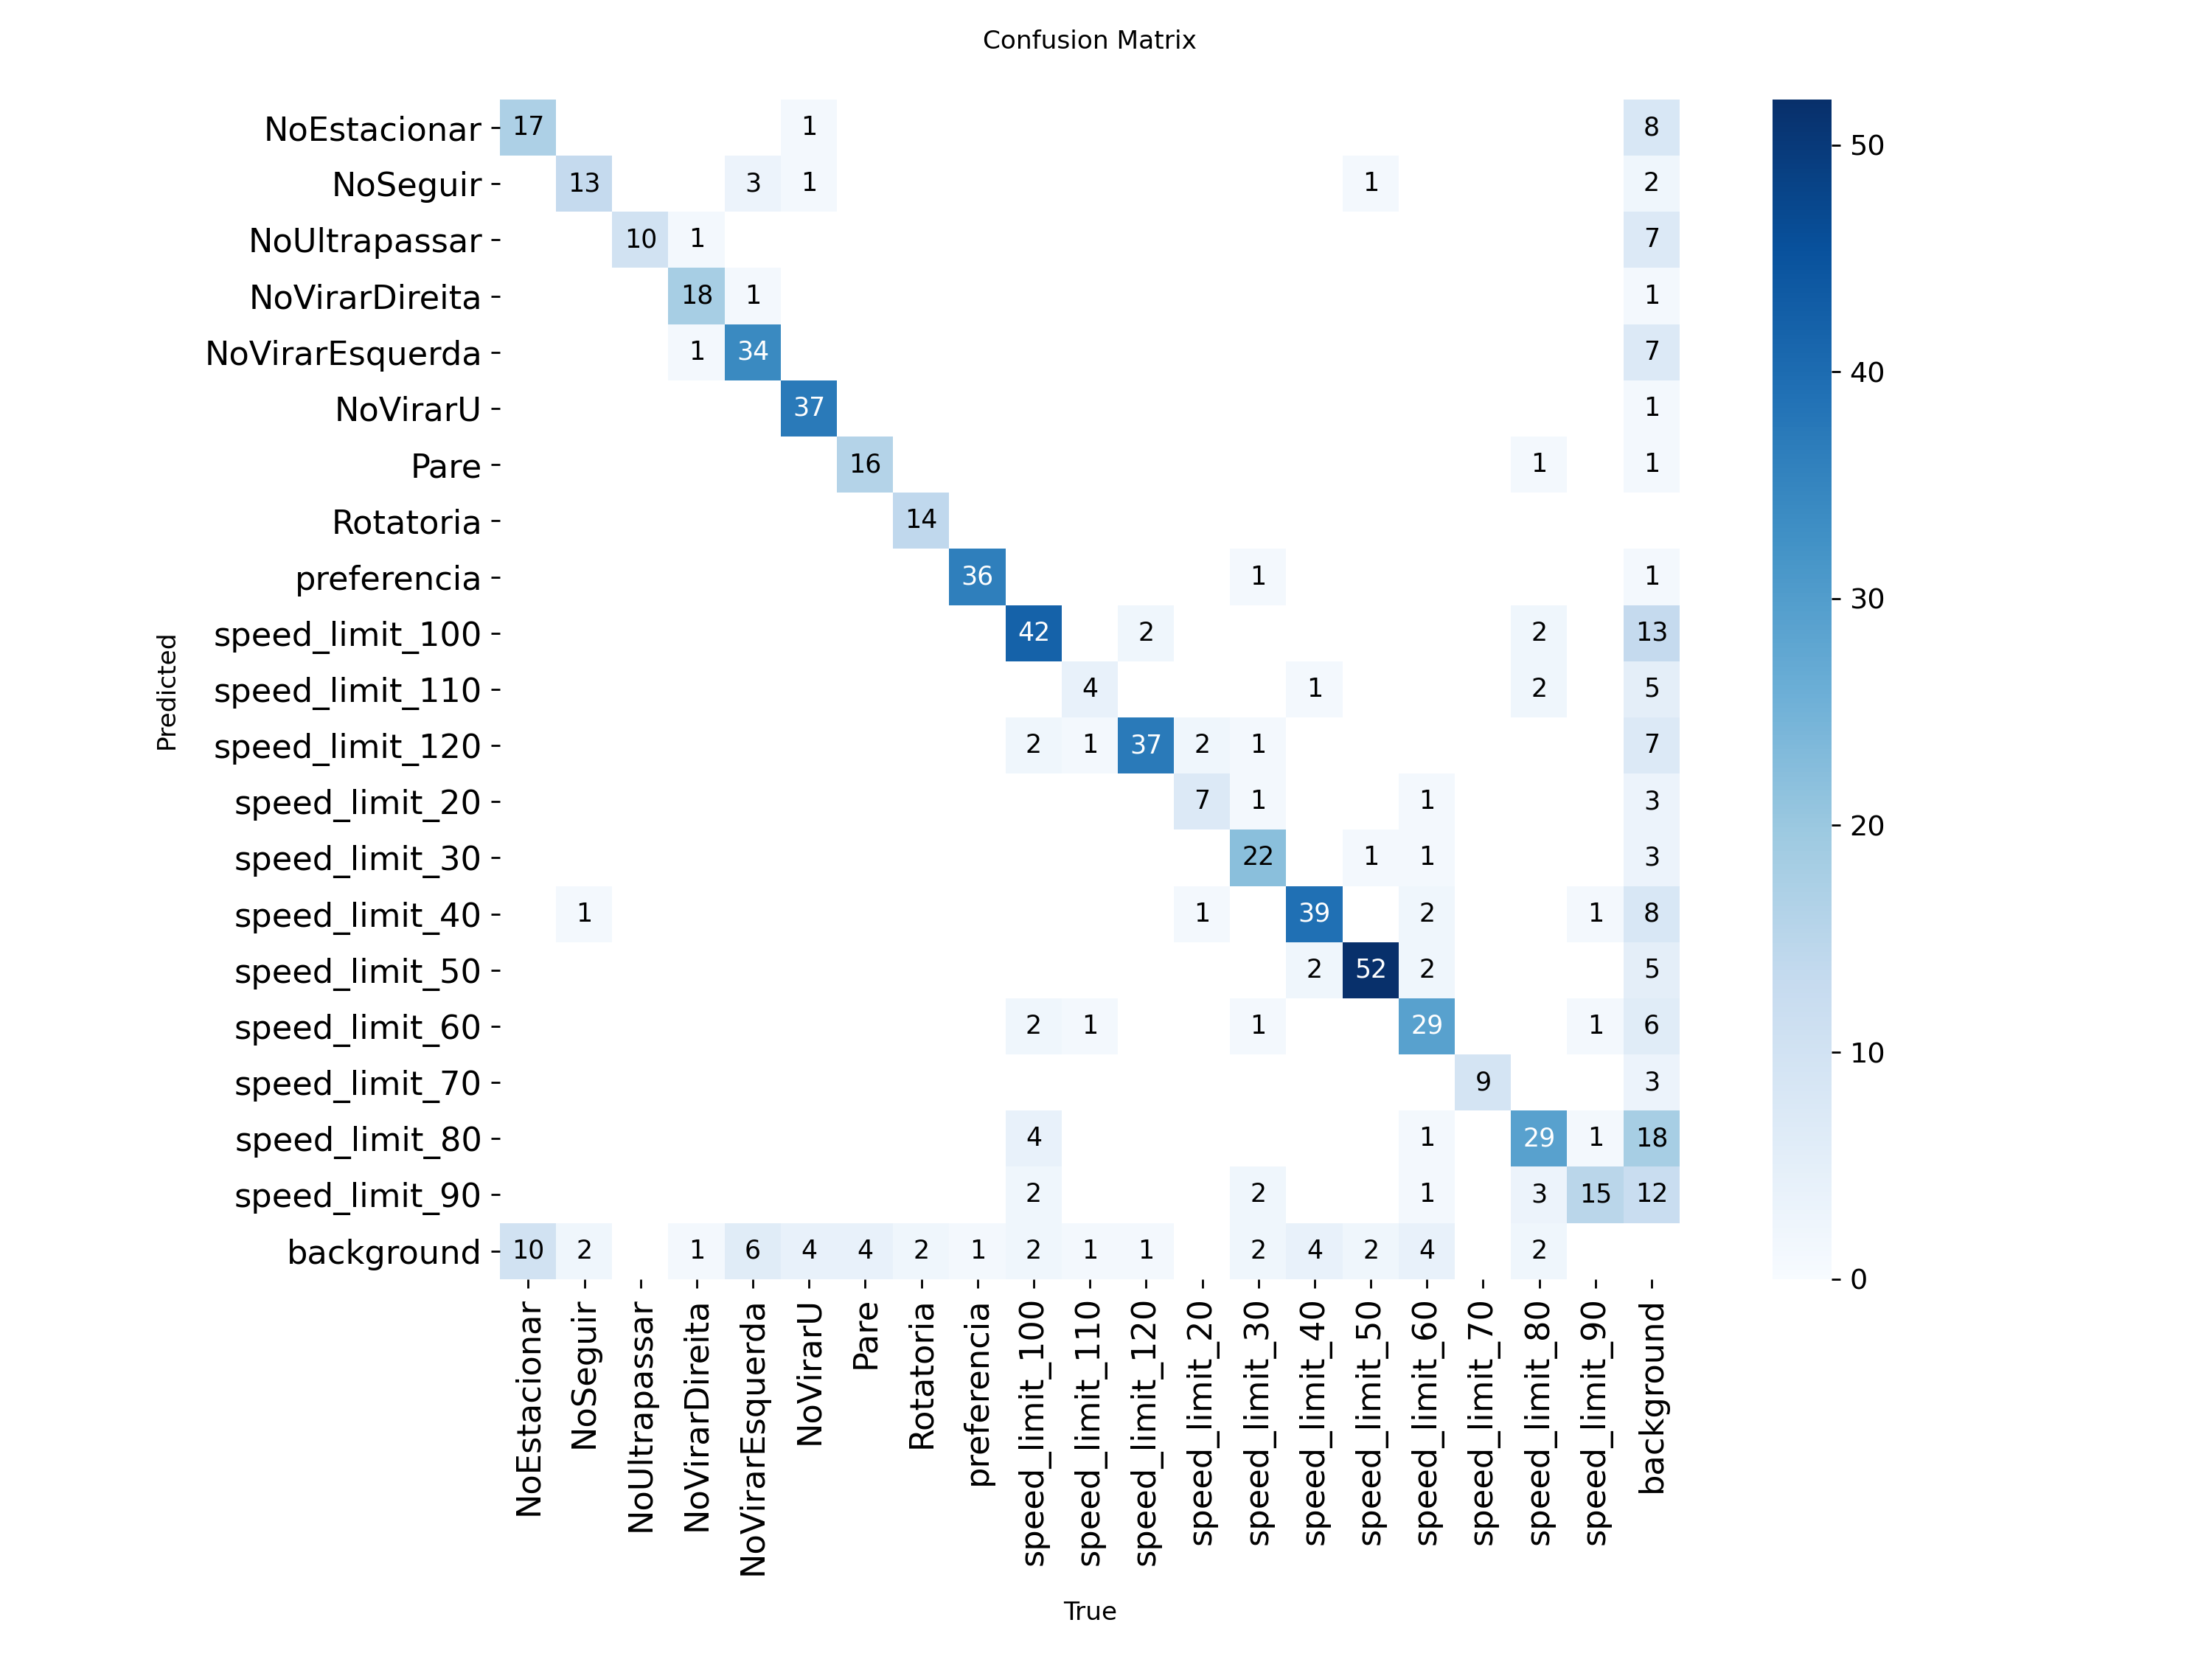

📊 Matriz de Confusão Numérica:
[[         17           0           0           0           0           1           0           0           0           0           0           0           0           0           0           0           0           0           0           0           8]
 [          0          13           0           0           3           1           0           0           0           0           0           0           0           0           0           1           0           0           0           0           2]
 [          0           0          10           1           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           7]
 [          0           0           0          18           1           0           0           0           0           0           0           0           0           0           0           0           

In [ ]:
# Mostrar a imagem da matriz de confusão gerada
conf_matrix_path = "/content/runs/detect/val4/confusion_matrix.png"
display(Image(filename=str(conf_matrix_path)))

# Se quiser também ver os dados numéricos da matriz:
conf_matrix = metrics.confusion_matrix.matrix
print("📊 Matriz de Confusão Numérica:")
print(conf_matrix)


###Carregando Imagem de exemplo

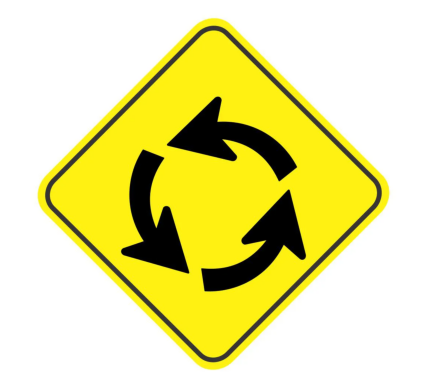

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Abre a imagem diretamente do caminho do arquivo local
image = Image.open("/content/placa_de_transito_advertencia_a_12_intersecao_em_circulo_5964551_1_502b9cd14fe8fbdee58bc536c0cb4e12.webp")

# Exibir a imagem no Colab
plt.imshow(image)
plt.axis('off')  # Opcional: remove os eixos
plt.show()

###Aplicação dos modelos

In [ ]:
from ultralytics import YOLO
import numpy as np
import cv2

# Modelos
model = YOLO('yolov8n.pt')  # Modelo COCO
model2 = YOLO('/content/bestpcc.pt')  # Seu modelo treinado

# Predição com os dois modelos
results = model(image)      # modelo COCO
results2 = model2(image)    # modelo customizado

# Nomes das classes
class_names = model.names
class_names2 = model2.names

# Identificar índices no modelo COCO
traffic_light_idx = stop_sign_idx = None
for idx, name in class_names.items():
    if "traffic light" in name.lower():
        traffic_light_idx = idx
    elif "stop sign" in name.lower():
        stop_sign_idx = idx

# Obter classes detectadas
detected_classes = results[0].boxes.cls.cpu().numpy().astype(int)
detected_classes2 = results2[0].boxes.cls.cpu().numpy().astype(int)

found = False


0: 608x640 (no detections), 68.4ms
Speed: 4.9ms preprocess, 68.4ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)

0: 608x640 1 Rotatoria, 11.6ms
Speed: 4.9ms preprocess, 11.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 640)


###Processamento de Imagens

⚠️ Placa detectada: Rotatoria com 98.55% de confiança


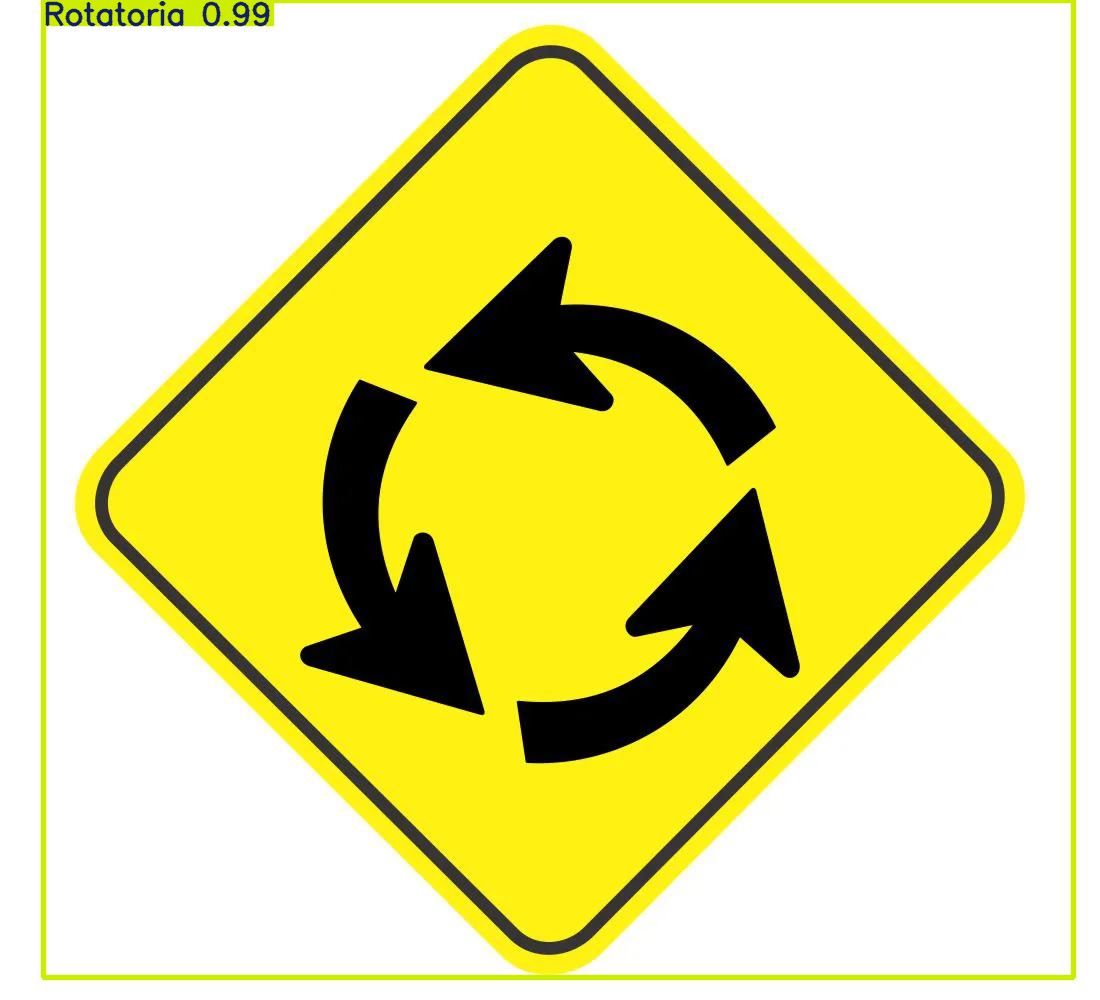

In [ ]:
# === SEMÁFORO ===
if traffic_light_idx in detected_classes:
    for box in results[0].boxes:
        class_id = int(box.cls[0])
        conf = float(box.conf[0])
        if class_id == traffic_light_idx and conf > 0.6:
            print(f"🚦 Semáforo detectado com {conf*100:.2f}% de confiança")
            image_np = np.array(image)
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            roi = image_np[y1:y2, x1:x2]
            hsv = cv2.cvtColor(roi, cv2.COLOR_RGB2HSV)

            red_mask1 = cv2.inRange(hsv, (0, 70, 50), (10, 255, 255))
            red_mask2 = cv2.inRange(hsv, (170, 70, 50), (180, 255, 255))
            yellow_mask = cv2.inRange(hsv, (20, 100, 100), (30, 255, 255))
            green_mask = cv2.inRange(hsv, (40, 70, 70), (90, 255, 255))

            red_area = np.sum(red_mask1) + np.sum(red_mask2)
            yellow_area = np.sum(yellow_mask)
            green_area = np.sum(green_mask)

            color = "Indefinido"
            if red_area > yellow_area and red_area > green_area:
                color = "🔴 Vermelho, aguarde 30 segundos"
            elif yellow_area > red_area and yellow_area > green_area:
                color = "🟡 Amarelo, aguarde 33 segundos"
            elif green_area > red_area and green_area > yellow_area:
                color = "🟢 Verde, caminho liberado"

            print(f"Cor do semáforo: {color}")
            found = True
    results[0].show()

# === PLACA DE PARE ===
if stop_sign_idx in detected_classes:
    for box in results[0].boxes:
        class_id = int(box.cls[0])
        conf = float(box.conf[0])
        if class_id == stop_sign_idx and conf > 0.6:
            print("🛑 Placa de PARE detectada!")
            results[0].show()
            found = True
            break

# === OUTRAS PLACAS (modelo 2) ===
if not found:
    for box in results2[0].boxes:
        class_id = int(box.cls[0])
        conf = float(box.conf[0])
        if conf > 0.6:
            class_name = class_names2.get(class_id, f"Classe {class_id}")
            print(f"⚠️ Placa detectada: {class_name} com {conf*100:.2f}% de confiança")
            results2[0].show()
            found = True
            break

# === NADA DETECTADO ===
if not found:
    print("🚫 Nenhum objeto relevante foi detectado na imagem.")


###Processamento de Videos

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO

# Carregar modelos
model = YOLO('yolov8n.pt')  # COCO (semáforo e pare)
model2 = YOLO('/content/bestpcc.pt')  # personalizado (outras placas)

# Abrir vídeo
video_path = "/content/VideoTrSPCUT.mp4"
cap = cv2.VideoCapture(video_path)

# Parâmetros do vídeo de saída
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = cap.get(cv2.CAP_PROP_FPS)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter("/content/TransitoSPdetection.mp4", fourcc, fps, (w, h))

# Obter classes
class_names1 = model.names
class_names2 = model2.names

# Dicionário de mensagens para o model2
acoes_model2 = {
    "pare": " Parar imediatamente",
    "rotatoria": " Rotatoria a frente",
    "preferencia": " De a preferencia",
    "noestacionar": " Proibido estacionar",
    "noseguir": " Não seguir em frente",
    "noultrapassar": " Proibido ultrapassar",
    "novirardireita": " Proibido virar a direita",
    "noviraresquerda": " Proibido virar a esquerda",
    "noviraru": " Proibido retorno",
}
# Adiciona limites de velocidade
for i in [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]:
    acoes_model2[f"speed_limit_{i}"] = f" Limite de velocidade: {i} km/h"

# Índices úteis
traffic_light_idx = stop_sign_idx = None
for idx, name in class_names1.items():
    if "traffic light" in name.lower():
        traffic_light_idx = idx
    elif "stop sign" in name.lower():
        stop_sign_idx = idx

# Função para mensagem sobre o frame
def draw_action_message(frame, text, color=(255, 255, 255), bg=(0, 0, 0)):
    (w_text, h_text), _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.9, 2)
    cv2.rectangle(frame, (10, 10), (10 + w_text + 20, 60), bg, -1)
    cv2.putText(frame, text, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# Função para detectar cor do semáforo
def analisar_cor_semaforo(roi):
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    red_mask1 = cv2.inRange(hsv, (0, 70, 50), (10, 255, 255))
    red_mask2 = cv2.inRange(hsv, (170, 70, 50), (180, 255, 255))
    yellow_mask = cv2.inRange(hsv, (20, 100, 100), (30, 255, 255))
    green_mask = cv2.inRange(hsv, (40, 70, 70), (90, 255, 255))

    red_area = np.sum(red_mask1) + np.sum(red_mask2)
    yellow_area = np.sum(yellow_mask)
    green_area = np.sum(green_mask)

    if red_area > yellow_area and red_area > green_area:
        return " Parando o veiculo", (0, 0, 255)
    elif yellow_area > red_area and yellow_area > green_area:
        return " Reduzindo velocidade", (0, 255, 255)
    elif green_area > red_area and green_area > yellow_area:
        return " Prosseguindo", (0, 255, 0)
    else:
        return " Semáforo indefinido", (255, 255, 255)

# Processar vídeo
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    found = False

    # === Modelo 1 ===
    results1 = model(frame, verbose=False)
    boxes1 = results1[0].boxes
    classes1 = boxes1.cls.cpu().numpy().astype(int)
    confs1 = boxes1.conf.cpu().numpy()

    for i, class_id in enumerate(classes1):
        xyxy = boxes1[i].xyxy[0].cpu().numpy().astype(int)
        x1, y1, x2, y2 = xyxy

        if class_id == traffic_light_idx and confs1[i] > 0.6:
            roi = frame[y1:y2, x1:x2]
            status, cor = analisar_cor_semaforo(roi)
            draw_action_message(frame, f" {status}", cor)
            cv2.rectangle(frame, (x1, y1), (x2, y2), cor, 2)
            cv2.putText(frame, "Semaforo", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, cor, 2)
            found = True

        elif class_id == stop_sign_idx and confs1[i] > 0.6:
            draw_action_message(frame, " Parar imediatamente", (0, 0, 255))
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.putText(frame, "PARE", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            found = True

    # === Modelo 2 ===
    if not found:
        results2 = model2(frame, verbose=False)
        boxes2 = results2[0].boxes
        classes2 = boxes2.cls.cpu().numpy().astype(int)
        confs2 = boxes2.conf.cpu().numpy()

        for i, class_id in enumerate(classes2):
            if confs2[i] > 0.6:
                xyxy = boxes2[i].xyxy[0].cpu().numpy().astype(int)
                x1, y1, x2, y2 = xyxy
                label = class_names2.get(class_id, f"Classe {class_id}")
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

                msg = acoes_model2.get(label.lower())
                if msg:
                    draw_action_message(frame, msg, (255, 255, 0))
                    found = True
                    break

    # Gravar frame no vídeo de saída
    out.write(frame)

# Finalizar
cap.release()
out.release()
print("✅ Vídeo final salvo: /content/TransitoSPdetection.mp4")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 17.8MB/s]


✅ Vídeo final salvo: /content/TransitoSPdetection.mp4
